### Exercise 3.2

In [378]:
import numpy as np

In [379]:
A = np.array([[ 1. ,-1. , 4. ],
              [ 1. , 4. ,-2. ], 
              [ 1. , 4. , 2. ],
              [ 1. ,-1. , 0. ]])

##### clgs

In [380]:
def clgs(A): 
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    Q = np.zeros([m,n]) #m*n mtx
    R = np.zeros([n,n])
    V = A.copy() 
    
    for j in range(n):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i],A[:,j])
            V[:,j] -= R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
    
    return Q,R

In [381]:
print(clgs(A.copy())[0])
print(clgs(A.copy())[1])

[[ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]]
[[ 2.  3.  2.]
 [ 0.  5. -2.]
 [ 0.  0.  4.]]


##### mgs

In [382]:
def mgs(A):
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    Q = A.copy() #m*n mtx    
    R = np.zeros([n,n])
    for j in range(n-1):
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] /= R[j,j]
        R[j,j+1:] = np.dot(Q[:,j],Q[:,j+1:])
        Q[:,j+1:] -= np.outer(Q[:,j],R[j,j+1:])
    R[-1,-1] = np.linalg.norm(Q[:,-1])
    Q[:,-1] /= R[-1,-1]

    return Q,R

In [383]:
print(mgs(A.copy())[0])
print(mgs(A.copy())[1])

[[ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]]
[[ 2.  3.  2.]
 [ 0.  5. -2.]
 [ 0.  0.  4.]]


##### qrhouse_total (qrhouse, formQ 한번에)

In [393]:
def qrhouse_total(A):
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    Q = np.identity(m) #m*m mtx    
    R = A.copy() #m*n mtx
    
    for i in range(n):
        x = R[i:,i]
        e = np.zeros_like(x) #vector
        if R[i,i] >= 0:
            e[0] += np.linalg.norm(x) * (+1.0)
        else:
            e[0] += np.linalg.norm(x) * (-1.0)
        v = x + e #not normalized
        
        Q_i = np.identity(m)
        Q_i[i:,i:] -= 2.0 * np.outer(v,v) / np.linalg.norm(v)**2
        
        R = np.dot(Q_i, R)
        Q = np.dot(Q, Q_i.T)
    
    return Q,R

In [394]:
print(qrhouse_total(A.copy())[0])
print(qrhouse_total(A.copy())[1])

[[-0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5  0.5]
 [-0.5  0.5  0.5  0.5]]
[[-2.00000000e+00 -3.00000000e+00 -2.00000000e+00]
 [ 1.85037171e-16 -5.00000000e+00  2.00000000e+00]
 [-2.40548322e-16 -9.22718692e-16 -4.00000000e+00]
 [-1.85037171e-16  3.50337043e-16  1.59872116e-16]]


##### qr_house

In [395]:
def qrhouse(A): #output: V,R
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    V = np.zeros([m,n]) #m*n mtx    
    R = A.copy() #m*n mtx
    
    for i in range(n):
        x = R[i:,i]
        e = np.zeros_like(x) #vector
        if R[i,i] >= 0:
            e[0] += np.linalg.norm(x) * (+1.0)
        else:
            e[0] += np.linalg.norm(x) * (-1.0)
        v = x + e #not normalized
        V[i:,i] = v 
        R[i:,i:] = R[i:,i:] - np.dot((2.0 * np.outer(v,v) / np.linalg.norm(v)**2),R[i:,i:])

    return V,R

In [396]:
print(qrhouse(A.copy())[0])
print(qrhouse(A.copy())[1])

[[ 3.          0.          0.        ]
 [ 1.          8.33333333  0.        ]
 [ 1.          3.33333333  6.4       ]
 [ 1.         -1.66666667 -3.2       ]]
[[-2.00000000e+00 -3.00000000e+00 -2.00000000e+00]
 [-2.22044605e-16 -5.00000000e+00  2.00000000e+00]
 [-2.22044605e-16  8.88178420e-16 -4.00000000e+00]
 [-2.22044605e-16 -2.22044605e-16  0.00000000e+00]]


##### formQ

In [397]:
def formQ(V):
    m = np.shape(V)[0]
    n = np.shape(V)[1]
    Q = np.identity(m) 
    
    for i in range(n):
        v = V[:,i]
        Q = np.dot(Q, np.identity(m) - 2.0 * np.outer(v,v) / np.linalg.norm(v)**2 ) #Q = Q1TQ2TQ3T = Q1Q2Q3 
    
    return Q

In [398]:
print(formQ(qrhouse(A.copy())[0]))

[[-0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5  0.5]
 [-0.5  0.5  0.5  0.5]]


#### 3.2.a)

In [399]:
U,X = np.linalg.qr(np.random.rand(80, 80))
V,X = np.linalg.qr(np.random.rand(80, 80)) 
S = np.zeros([80,80])
for j in range(0,80):
    S[j,j] = 2.**(-(j+1))
A = np.dot(U,np.dot(S,V))

Qc, Rc = clgs(A.copy())
Qm, Rm = mgs(A.copy())

In [400]:
import matplotlib.pyplot as plt

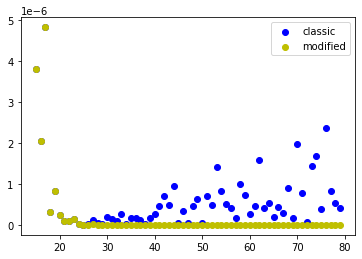

In [401]:
plt.figure()

plt.scatter(range(15,80), Rc.diagonal()[15:], c='b', label='classic')
plt.scatter(range(15,80), Rm.diagonal()[15:], c='y', label='modified')
plt.legend(['classic','modified'])

plt.show()

In [402]:
A = np.array([[.70000,.70711],
              [.70001,.70711]])
Qm, Rm = mgs(A.copy())
Q, R = qrhouse_total(A.copy())
print(Qm)
print(Rm)
print(" ")
print(Q)
print(R)
print(" ")
print(np.linalg.norm(np.dot(Qm.T,Qm)-np.identity(2)))
print(np.linalg.norm(np.dot(Q.T,Q)-np.identity(2)))

[[ 0.70710173  0.70711183]
 [ 0.70711183 -0.70710173]]
[[9.89956565e-01 1.00000455e+00]
 [0.00000000e+00 7.14283864e-06]]
 
[[-0.70710173  0.70711183]
 [-0.70711183 -0.70710173]]
[[-9.89956565e-01 -1.00000455e+00]
 [ 1.16066501e-16  7.14283864e-06]]
 
3.254726094493924e-11
3.451616545114987e-16


householder가 더 stable하다. ( householder: backward stable. i.e. norm(deltaA) / norm(A) <= O(epsilon_machine) ) 

### Exercise 3.3

In [403]:
from math import *

In [404]:
A = np.array([[ 1. ,-1. , 4. ],
              [ 1. , 4. ,-2. ], 
              [ 1. , 4. , 2. ],
              [ 1. ,-1. , 0. ]])

In [405]:
def trigonometry(x,y):
    z = sqrt(x**2+y**2)
    c = x/z #cos(-theta) = cos(theta)
    s = -y/z #sin(-theta) = -sin(theta)
    return (c,s)      

def givens_rotation(A):
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    Q = np.identity(m) #m*m mtx
    R = A.copy() #m*n mtx
    
    for j in range(n):
        for i in range(m-1, j, -1):
            if R[i,j] != 0:
                (c,s) = trigonometry(R[j,j],R[i,j])

                G = np.identity(m)
                G[i,i] = c
                G[j,j] = c
                G[i,j] = s
                G[j,i] = -s
                
                R = np.dot(G,R)
                Q = np.dot(Q,G.T)     
    return (Q,R)

In [406]:
print(givens_rotation(A.copy())[0])
print(givens_rotation(A.copy())[1])

[[ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5  0.5]]
[[ 2.00000000e+00  3.00000000e+00  2.00000000e+00]
 [-6.40987562e-17  5.00000000e+00 -2.00000000e+00]
 [ 6.40987562e-17 -6.39804887e-17  4.00000000e+00]
 [ 6.40987562e-17 -6.39804887e-17  1.70656864e-16]]


아래와 같이 givens_rotation()의 결과는 qrhouse_total()의 결과와 동일한다. (단지 부호 차이만 있을 뿐이다.)

In [407]:
print(qrhouse_total(A.copy())[0])
print(qrhouse_total(A.copy())[1])

[[-0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5  0.5]
 [-0.5  0.5  0.5  0.5]]
[[-2.00000000e+00 -3.00000000e+00 -2.00000000e+00]
 [ 1.85037171e-16 -5.00000000e+00  2.00000000e+00]
 [-2.40548322e-16 -9.22718692e-16 -4.00000000e+00]
 [-1.85037171e-16  3.50337043e-16  1.59872116e-16]]


### Exercise 4.3.

In [408]:
def random_matrix_normal(m):
    A = np.random.normal(0, 1/sqrt(m), (m, m))
    return A

#### 4.3.a)

In [409]:
A = random_matrix_normal(100)
lamda = np.linalg.eig(A.copy())[0]
#print(lamda)
#print(np.shape(lamda))

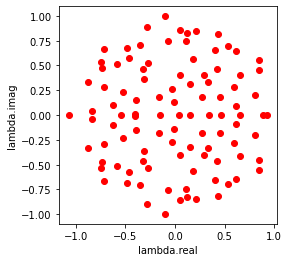

In [410]:
plt.figure()

plt.scatter(lamda.real, lamda.imag, c='r')

plt.xlabel("lambda.real")
plt.ylabel("lambda.imag")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

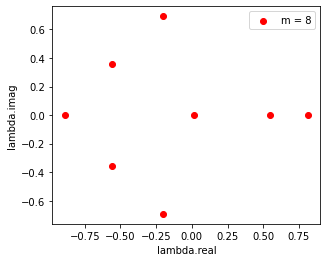

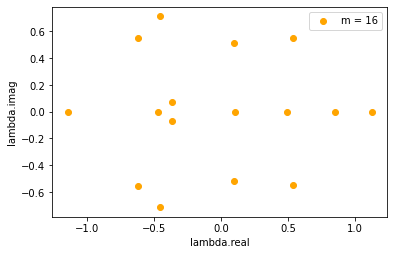

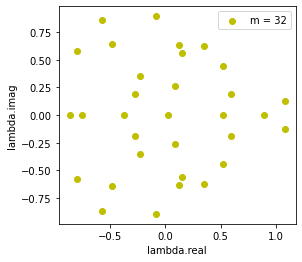

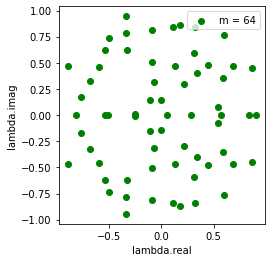

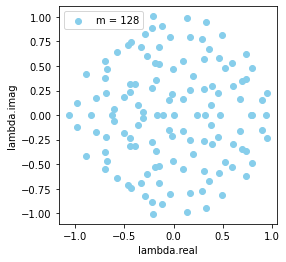

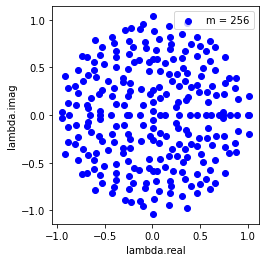

In [411]:
iteration = 100
for m, color in zip([8,16,32,64,128,256], ['r','orange','y','g','skyblue','b']):
    plt.figure()
    for i in range(iteration):
        A = random_matrix_normal(m)
        lamda = np.linalg.eig(A.copy())[0]
    plt.scatter(lamda.real, lamda.imag, c=color)
    plt.xlabel("lambda.real")
    plt.ylabel("lambda.imag")
    plt.gca().set_aspect('equal')
    plt.legend(["m = "+str(m)])
    plt.show()
    

As m -> inf, spectral radius -> 1. (spectral radius = sqrt(var * m) = sqrt((1/m) * m) = m)

#### 4.3.b)

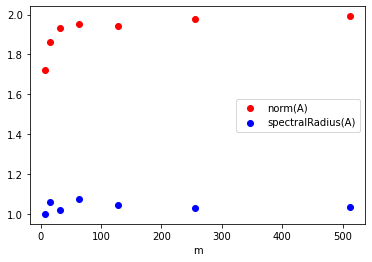

In [416]:
plt.figure()

iteration = 10
for i in range(3,10):
    m = 2**i
    norm = 0
    spectralRadius = 0
    for j in range(iteration):
        A = random_matrix_normal(m)
        lamda = np.linalg.eig(A.copy())[0]
    
        norm += (np.linalg.norm(A.copy(),2))/10.0
        spectralRadius += (max(abs(lamda)))/10.0
    
    plt.scatter(m, norm, c='r')
    plt.scatter(m, spectralRadius, c='b')

plt.xlabel("m")
plt.legend(['norm(A)','spectralRadius(A)'])

plt.show()
    

norm 값은 점점 2.0에 가까워진다.
spectral radius 값은 점점 1.0에 가까워진다.

#### 4.3.c)

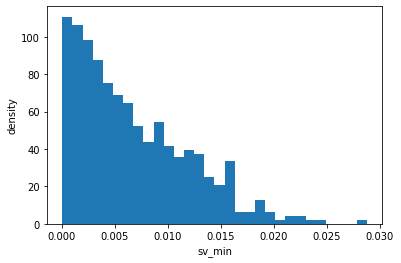

m = 100 : (cnt2,cnt4,cnt8,cnt16) = (1.0000000000000007,0.9980000000000008,0.8420000000000006,0.5540000000000004)


In [417]:
plt.figure()

iteration = 500
sv_min_list = []
cnt2, cnt4, cnt8, cnt16 = 0, 0, 0, 0
for i in range(iteration):
    A = random_matrix_normal(100)
    sv_min = min(np.linalg.svd(A)[1])
    if sv_min <= 1/20.0:
        cnt2 += 1/iteration
    if sv_min <= 1/40.0:
        cnt4 += 1/iteration
    if sv_min <= 1/80.0:
        cnt8 += 1/iteration
    if sv_min <= 1/160.0:
        cnt16 += 1/iteration
    sv_min_list.append(sv_min)

plt.hist(sv_min_list, density = True, bins = 30)
plt.xlabel("sv_min")
plt.ylabel("density")
plt.show()

print("m = %d : (cnt2,cnt4,cnt8,cnt16) = (%s,%s,%s,%s)"%(100, cnt2, cnt4, cnt8, cnt16))
# cntN := P(sv_min <= 1/(N*10.0))

In [418]:
def cdf_exp(m,t): #= P(X<t) where X~exp(sqrt(2)*m) (m: the number of rows)
    return 1 - exp(-sqrt(2)*m*t) # sqrt(2)*m: 숫자를 보고 끼워맞춘 값.

def pdf_exp(m,t):
    return sqrt(2)*m*exp(-sqrt(2)*m*t)
               
for i in (1/20,1/40,1/80,1/160):
    print("cdf_exp(100,%f):"%i, cdf_exp(100,i))

cdf_exp(100,0.050000): 0.9991506742952808
cdf_exp(100,0.025000): 0.9708568068887575
cdf_exp(100,0.012500): 0.8292862246002319
cdf_exp(100,0.006250): 0.5868247642951383


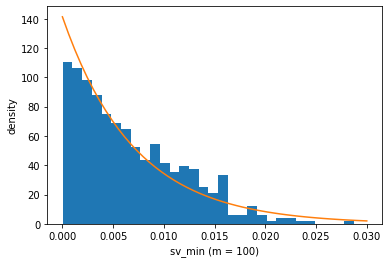

In [419]:
plt.figure()

plt.hist(sv_min_list, density = True, bins = 30)

t = np.linspace(0, 0.030) 
pdf_exp_2 = np.vectorize(pdf_exp)
y = pdf_exp_2(100,t)
plt.plot(t,y)

plt.xlabel("sv_min (m = %d)" %100)
plt.ylabel("density")
plt.show()

분포의 tail 부분은 근사적으로 exponential distribution을 따른다. 

<Figure size 432x288 with 0 Axes>

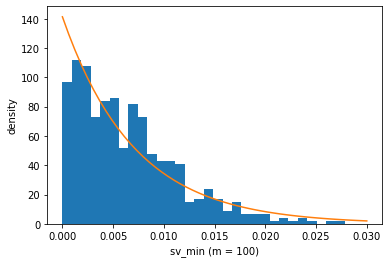

m = 100 : (cnt2,cnt4,cnt8,cnt16) = (1.0000000000000007,0.9960000000000008,0.8800000000000007,0.5500000000000004)


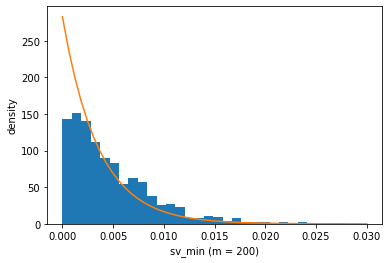

m = 200 : (cnt2,cnt4,cnt8,cnt16) = (1.0000000000000007,1.0000000000000007,0.9980000000000008,0.8520000000000006)


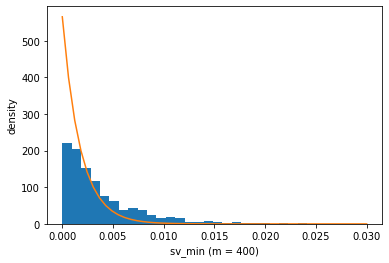

m = 400 : (cnt2,cnt4,cnt8,cnt16) = (1.0000000000000007,1.0000000000000007,1.0000000000000007,0.9960000000000008)


In [420]:
plt.figure()

iteration = 500
sv_min_list = []
for m in (100, 200, 400):
    plt.figure()
    cnt2, cnt4, cnt8, cnt16 = 0, 0, 0, 0
    for i in range(iteration):
        A = random_matrix_normal(m)
        sv_min = min(np.linalg.svd(A)[1])
        if sv_min <= 1/20.0:
            cnt2 += 1/iteration
        if sv_min <= 1/40.0:
            cnt4 += 1/iteration
        if sv_min <= 1/80.0:
            cnt8 += 1/iteration
        if sv_min <= 1/160.0:
            cnt16 += 1/iteration
        sv_min_list.append(sv_min)
    plt.hist(sv_min_list, density = True, bins = 30)  
    
    y = pdf_exp_2(m,t)
    plt.plot(t,y)
    
    plt.xlabel("sv_min (m = %d)" %m)
    plt.ylabel("density")
    plt.show()
    print("m = %d : (cnt2,cnt4,cnt8,cnt16) = (%s,%s,%s,%s)"%(m, cnt2, cnt4, cnt8, cnt16))
    # cntN := P(sv_min <= 1/(N*10.0))

In [421]:
for i in (1/20,1/40,1/80,1/160):
    print("cdf_exp(100,%f):"%i, cdf_exp(100,i))
print(" ")
for i in (1/20,1/40,1/80,1/160):
    print("cdf_exp(200,%f):"%i, cdf_exp(200,i))
print(" ")
for i in (1/20,1/40,1/80,1/160):
    print("cdf_exp(400,%f):"%i, cdf_exp(400,i))

cdf_exp(100,0.050000): 0.9991506742952808
cdf_exp(100,0.025000): 0.9708568068887575
cdf_exp(100,0.012500): 0.8292862246002319
cdf_exp(100,0.006250): 0.5868247642951383
 
cdf_exp(200,0.050000): 0.9999992786458473
cdf_exp(200,0.025000): 0.9991506742952808
cdf_exp(200,0.012500): 0.9708568068887575
cdf_exp(200,0.006250): 0.8292862246002319
 
cdf_exp(400,0.050000): 0.9999999999994796
cdf_exp(400,0.025000): 0.9999992786458473
cdf_exp(400,0.012500): 0.9991506742952808
cdf_exp(400,0.006250): 0.9708568068887575


m의 크기가 커질 수록, min(singular vlaue)의 값이 0에 가까운 값을 가질 확률이 커졌다.

참고: 번외로, (m * sv_min) ** 2값의 분포를 확인해보자. (Define it as sv_min_square.)

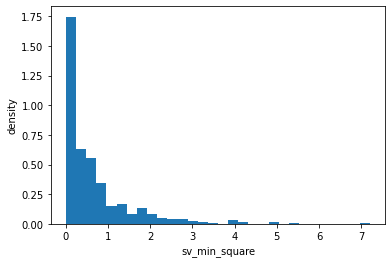

m = 100 : (cnt2,cnt4,cnt8,cnt16) = (0.20200000000000015,0.1480000000000001,0.12600000000000008,0.08000000000000006)


In [422]:
plt.figure()

iteration = 500
sv_min_list = []
cnt2, cnt4, cnt8, cnt16 = 0, 0, 0, 0
for i in range(iteration):
    A = random_matrix_normal(100)
    sv_min_square = 100**2 * (min(np.linalg.svd(A)[1]))**2
    if sv_min_square <= 1/20:
        cnt2 += 1/iteration
    if sv_min_square <= 1/40:
        cnt4 += 1/iteration
    if sv_min_square <= 1/80:
        cnt8 += 1/iteration
    if sv_min_square <= 1/160:
        cnt16 += 1/iteration
    sv_min_list.append(sv_min_square)

plt.hist(sv_min_list, density = True, bins = 30)
plt.xlabel("sv_min_square")
plt.ylabel("density")
plt.show()

print("m = %d : (cnt2,cnt4,cnt8,cnt16) = (%s,%s,%s,%s)"%(100, cnt2, cnt4, cnt8, cnt16))
# cntN := P(sv_min <= 1/(N*10.0))

위의 결과를 보면 보다 깔끔하게 exponential distribution에 가까워짐을 확인 할 수 있다. 이의 분포를 유추해보자.

In [423]:
def cdf_exp_for_square(m,t): #= P(X<t)
    return 1 - exp(-t/2-sqrt(t)) 

def pdf_exp_for_square(m,t):
    return ((1 / (2*sqrt(t))) + 0.5) * exp(-t/2-sqrt(t)) 
               
for i in (1/20,1/40,1/80,1/160):
    print("cdf_exp_for_square(100,%f):"%i, cdf_exp_for_square(100,i))

cdf_exp_for_square(100,0.050000): 0.22011343374313996
cdf_exp_for_square(100,0.025000): 0.15685293596331662
cdf_exp_for_square(100,0.012500): 0.11135140148779077
cdf_exp_for_square(100,0.006250): 0.07889564366222768


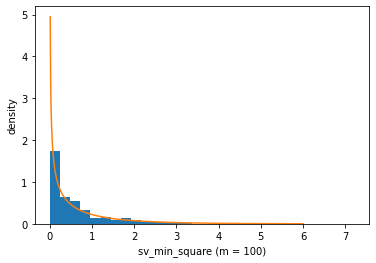

In [424]:
plt.figure()

plt.hist(sv_min_list, density = True, bins = 30)

t = np.linspace(0, 6, 600)[1:] 
#print(pdf_exp_for_square(100,t[0]))
pdf_exp_for_square_2 = np.vectorize(pdf_exp_for_square)
y = pdf_exp_for_square_2(100,t)
plt.plot(t,y)

plt.xlabel("sv_min_square (m = %d)" %100)
plt.ylabel("density")
plt.show()

<Figure size 432x288 with 0 Axes>

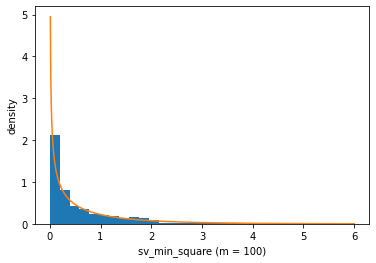

m = 100 : (cnt2,cnt4,cnt8,cnt16) = (0.19000000000000014,0.1320000000000001,0.09400000000000007,0.05800000000000004)


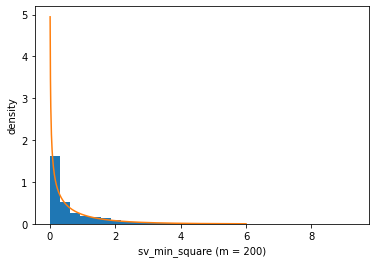

m = 200 : (cnt2,cnt4,cnt8,cnt16) = (0.18600000000000014,0.1400000000000001,0.09400000000000007,0.06600000000000004)


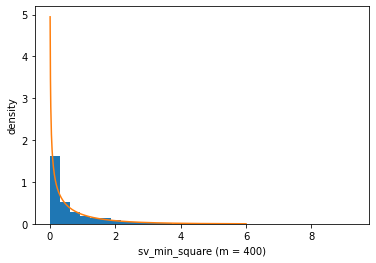

m = 400 : (cnt2,cnt4,cnt8,cnt16) = (0.23400000000000018,0.1380000000000001,0.09000000000000007,0.06200000000000004)


In [425]:
plt.figure()

iteration = 500
sv_min_list = []
for m in (100, 200, 400):
    plt.figure()
    cnt2, cnt4, cnt8, cnt16 = 0, 0, 0, 0
    for i in range(iteration):
        A = random_matrix_normal(m)
        sv_min_square = m**2 * (min(np.linalg.svd(A)[1]))**2
        if sv_min_square <= 1/20.0:
            cnt2 += 1/iteration
        if sv_min_square <= 1/40.0:
            cnt4 += 1/iteration
        if sv_min_square <= 1/80.0:
            cnt8 += 1/iteration
        if sv_min_square <= 1/160.0:
            cnt16 += 1/iteration
        sv_min_list.append(sv_min_square)
    plt.hist(sv_min_list, density = True, bins = 30)  
    
    y = pdf_exp_for_square_2(m,t)
    plt.plot(t,y)
    
    plt.xlabel("sv_min_square (m = %d)" %m)
    plt.ylabel("density")
    plt.show()
    print("m = %d : (cnt2,cnt4,cnt8,cnt16) = (%s,%s,%s,%s)"%(m, cnt2, cnt4, cnt8, cnt16))
    # cntN := P(sv_min <= 1/(N*10.0))

다른 m 값에 대해서도 들어 맞는 것을 확인할 수 있었다.

#### 4.3.d) - a)

In [426]:
def random_U_normal(m):
    A = np.random.normal(0, 1/sqrt(m), (m, m))
    for i in range(m):
        for j in range(i):
            A[i,j] = 0
    return A

In [427]:
print(random_U_normal(3))

[[-0.51940786  0.10896252 -0.46290791]
 [ 0.         -0.55107576  0.43137019]
 [ 0.          0.         -0.07970372]]


In [428]:
A = random_U_normal(100)
lamda = np.linalg.eig(A.copy())[0]

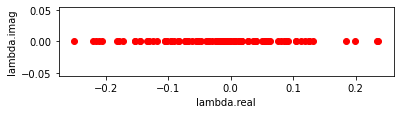

In [429]:
plt.figure()

plt.scatter(lamda.real, lamda.imag, c='r')

plt.xlabel("lambda.real")
plt.ylabel("lambda.imag")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

random_U_normal의 eigenvalues는 diagonal의 entries이다. 모든 eigenvalue가 실수이므로 위와 같은 plot이 생성되었다.

In [430]:
for m in (8,16,32,64):
    A = random_U_normal(m)
    lamda = np.linalg.eig(A.copy())[0]
    print("m = %d: spectral radius of A ="%m, max(abs(lamda)))

m = 8: spectral radius of A = 0.7336623519552399
m = 16: spectral radius of A = 0.4069635305380551
m = 32: spectral radius of A = 0.4160633062952862
m = 64: spectral radius of A = 0.3314240144129823


m이 커지면서, spectral radius값도 작아진다.

#### 4.3.d) - b)

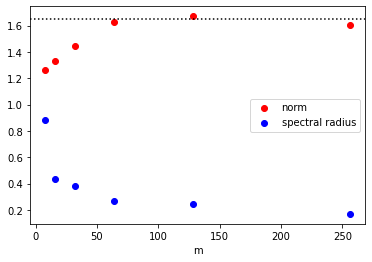

In [431]:
plt.figure()

for i in range(3,9):
    m = 2**i
    A = random_U_normal(m)
    norm = np.linalg.norm(A.copy(),2)
    lamda = np.linalg.eig(A.copy())[0]
    
    plt.scatter(m, norm, c='r')
    plt.scatter(m, max(abs(lamda)), c='b')
    #plt.scatter(m, exp(1/2), c='black')

    
    #ATA = np.dot(A.T,A)
    #lamda2 = np.linalg.eig(ATA)[0]
    #norm2 = sqrt(max(abs(lamda2)))
    #plt.scatter(m, norm2, c='b')
    
plt.xlabel("m")
plt.legend(['norm','spectral radius'])
plt.axhline(y=exp(1/2), color='black', linestyle=':')
plt.show()

그림상 norm은 exp(1/2)에 수렴할 것으로 예상된다.

#### 4.3.d) - c)

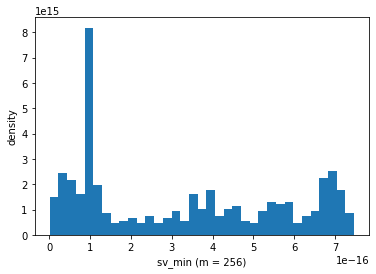

m = 100 : (cnt2,cnt4,cnt8,cnt16) = (0.6840000000000005,0.45800000000000035,0.3760000000000003,0.12600000000000008)


In [432]:
plt.figure()

sv_min_list = []
cnt2, cnt4, cnt8, cnt16 = 0, 0, 0, 0
for i in range(500):
    A = random_U_normal(100)
    sv_min = min(np.linalg.svd(A)[1])
    if sv_min <= 1/2.0 * 10**(-15):
        cnt2 += 1/500.0
    if sv_min <= 1/4.0 * 10**(-15):
        cnt4 += 1/500.0
    if sv_min <= 1/8.0 * 10**(-15):
        cnt8 += 1/500.0
    if sv_min <= 1/16.0 * 10**(-15):
        cnt16 += 1/500.0
    sv_min_list.append(sv_min)

plt.hist(sv_min_list, density = True, bins = 35)
plt.xlabel("sv_min (m = %d)" %m)
plt.ylabel("density")
plt.show()

print("m = %d : (cnt2,cnt4,cnt8,cnt16) = (%s,%s,%s,%s)"%(100, cnt2, cnt4, cnt8, cnt16))
# cntN := P(sv_min <= 1/(N) * 10**(-15))

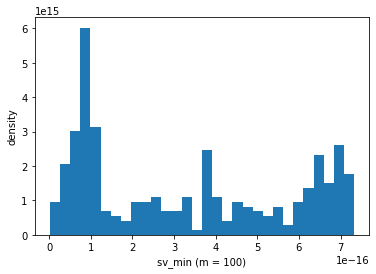

m = 100 : (cnt2,cnt4,cnt8,cnt16) = (0.6899999999999993,0.4633333333333344,0.37000000000000044,0.09999999999999994)


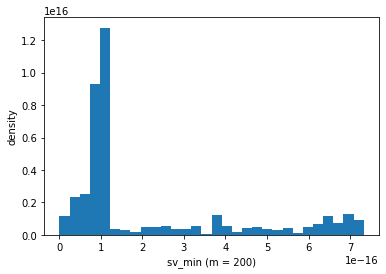

m = 200 : (cnt2,cnt4,cnt8,cnt16) = (0.9999999999999961,0.9999999999999961,0.9999999999999961,0.1199999999999999)


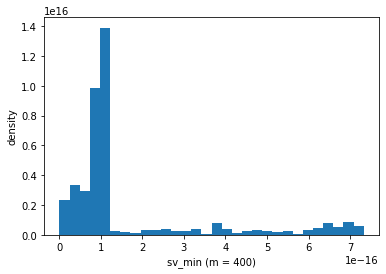

m = 400 : (cnt2,cnt4,cnt8,cnt16) = (0.9999999999999961,0.9999999999999961,0.9999999999999961,0.3)


In [434]:
sv_min_list = []
iteration = 300
for m in (100, 200, 400):
    plt.figure()
    cnt2, cnt4, cnt8, cnt16 = 0, 0, 0, 0
    for i in range(iteration):
        A = random_U_normal(m)
        sv_min = min(np.linalg.svd(A)[1])
        if sv_min <= 1/2.0 * 10**(-15):
            cnt2 += 1/iteration
        if sv_min <= 1/4.0 * 10**(-15):
            cnt4 += 1/iteration
        if sv_min <= 1/8.0 * 10**(-15):
            cnt8 += 1/iteration
        if sv_min <= 1/16.0 * 10**(-15):
            cnt16 += 1/iteration
        sv_min_list.append(sv_min)
    plt.hist(sv_min_list, density = True, bins = 30)  
    plt.xlabel("sv_min (m = %d)" %m)
    plt.ylabel("density")
    plt.show()
    print("m = %d : (cnt2,cnt4,cnt8,cnt16) = (%s,%s,%s,%s)"%(m, cnt2, cnt4, cnt8, cnt16))
    # cntN := P(sv_min <= 1/(N) * 10**(-15))

이들의 분포가 10 ** (-16) 정도에서 분포되어 있음을 관찰할 수 있었다. 

In [435]:
print(np.finfo(float).eps)

2.220446049250313e-16


확실하지는 않지만, 그 이유는 위의 machine_epsilon값과 관련이 있지 않을까라는 생각이 든다.

### Exercise 4.6

In [436]:
from math import *

In [437]:
m = 50
n = 12

In [438]:
t = np.linspace(0, 1, num=m)
print(t)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [439]:
A = np.vander(t,n,increasing=True)

In [440]:
b = np.zeros(m)
for i in range(m):
    b[i] = cos(4*t[i])
print(b)

[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785141
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]


#### 4.6.a) Normal equations

In [441]:
ATA = np.dot(A.T,A)
ATb = np.dot(A.T,b)

In [442]:
xa = np.linalg.solve(ATA,ATb)
print(xa)
print(np.dot(A,xa))

[ 9.99999973e-01  7.87436649e-06 -8.00029484e+00  4.32313845e-03
  1.06337679e+01  1.47582860e-01 -6.10578772e+00  7.66441836e-01
  6.97307038e-01  7.40518287e-01 -6.80965844e-01  1.43455873e-01]
[ 0.99999997  0.99666995  0.98670182  0.97016206  0.94716085  0.91785139
  0.88242888  0.84112922  0.79422748  0.74203603  0.68490246  0.62320731
  0.55736148  0.48780351  0.41499669  0.33942591  0.2615945   0.18202082
  0.10123485  0.01977464 -0.06181728 -0.14299748 -0.2232253  -0.3019664
 -0.37869635 -0.45290412 -0.52409545 -0.59179621 -0.65555549 -0.71494864
 -0.76958009 -0.81908599 -0.86313661 -0.90143859 -0.93373681 -0.95981618
 -0.97950299 -0.99266613 -0.99921793 -0.99911475 -0.99235727 -0.97899049
 -0.95910344 -0.93282857 -0.90034089 -0.86185677 -0.81763255 -0.76796275
 -0.71317817 -0.6536436 ]


#### 4.6.b) mgs

In [443]:
Q,R = mgs(A)

In [444]:
def back_substitution(U, y):
    n = U.shape[1]
    x = np.zeros(n) 
    
    if U[n-1][n-1] == 0:
        raise ValueError
    
    for j in range(n-1,-1,-1):
        x[j] += y[j]
        for k in range(j+1,n):
            x[j] -= U[j,k] * x[k] 
        x[j] /= U[j,j]
    return x

#R = np.array([[1.,2.,4.],
#              [0.,1.,1.],
#              [0.,0.,2.]])
#b = np.array([1,2,4,1])
#print(back_substitution(R.copy(),b.copy()))

In [445]:
QTb = np.dot(Q.T,b)
xb = back_substitution(R.copy(), QTb.copy())
print(xb)
print(np.dot(A,xb))

[ 1.00000000e+00 -4.58240104e-07 -7.99998009e+00 -3.33437814e-04
  1.06695290e+01 -1.42085086e-02 -5.64611093e+00 -7.68632224e-02
  1.69520470e+00  5.00761554e-03 -3.73871301e-01  8.79830113e-02]
[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785142
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]


#### 4.6.c) qrhouse_total

In [446]:
Q,R = qrhouse_total(A)

In [447]:
QTb = np.dot(Q.T,b)
xc = back_substitution(R.copy(), QTb.copy())
print(xc)
print(np.dot(A,xc))

[ 1.00000000e+00 -4.22742981e-07 -7.99998124e+00 -3.18763216e-04
  1.06694308e+01 -1.38202875e-02 -5.64707563e+00 -7.53160216e-02
  1.69360696e+00  6.03211123e-03 -3.74241705e-01  8.80405763e-02]
[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785142
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]


#### 4.6.d) built-in qr

In [448]:
Q,R = np.linalg.qr(A)

In [449]:
QTb = np.dot(Q.T,b)
xd = back_substitution(R.copy(), QTb.copy())
print(xd)
print(np.dot(A,xd))

[ 1.00000000e+00 -4.22743380e-07 -7.99998124e+00 -3.18763322e-04
  1.06694308e+01 -1.38202901e-02 -5.64707562e+00 -7.53160326e-02
  1.69360697e+00  6.03210277e-03 -3.74241701e-01  8.80405757e-02]
[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785142
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]


#### 4.6.e) x = A\b

프로그램 실행자의 환경에 의해 혹은 다른 여러 가능성에 의해, 시행이 되지 않을 가능성이 있다. 

In [450]:
#import matlab.engine
#eng = matlab.engine.start_matlab()

In [451]:
#from numpy import array, arange
#from matlab import double as double_m

In [452]:
#eng.desktop(nargout=0)

In [453]:
#eng.eval("x = A\b;",nargout=0)

In [454]:
#x = array(eng.workspace['x'])
#print(x)

In [455]:
#eng.quit()

위 코드는 error가 나올 가능성이 크기 때문에, 아래 코드에서는 matlab의 left mtx division과 유사한 python의 함수를 쓰도록 하겠다. 

In [456]:
xe = np.linalg.lstsq(A,b,rcond=None)[0]
print(xe)
print(np.dot(A,xe))

[ 1.00000000e+00 -4.22743385e-07 -7.99998124e+00 -3.18763318e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160319e-02
  1.69360697e+00  6.03210333e-03 -3.74241701e-01  8.80405757e-02]
[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785142
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]


#### 4.6.f) svd

In [457]:
U,s,VT = np.linalg.svd(A)
S_pseudo = np.zeros([n,m])
S_pseudo[np.diag_indices(n)] = np.ones(n) / s
#print(s)
#print(S_pseudo)

In [458]:
xf = np.dot(np.dot(np.dot(VT.T,S_pseudo),U.T),b)
print(xf)
print(np.dot(A,xf))

[ 1.00000000e+00 -4.22743378e-07 -7.99998124e+00 -3.18763307e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160322e-02
  1.69360697e+00  6.03210216e-03 -3.74241701e-01  8.80405757e-02]
[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785142
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]


#### 4.6.g)

In [459]:
print("xa:")
print(xa)
print("xb:")
print(xb)
print("xc:")
print(xc)
print("xd:")
print(xd)
print("xe:")
print(xe)
print("xf:")
print(xf)

xa:
[ 9.99999973e-01  7.87436649e-06 -8.00029484e+00  4.32313845e-03
  1.06337679e+01  1.47582860e-01 -6.10578772e+00  7.66441836e-01
  6.97307038e-01  7.40518287e-01 -6.80965844e-01  1.43455873e-01]
xb:
[ 1.00000000e+00 -4.58240104e-07 -7.99998009e+00 -3.33437814e-04
  1.06695290e+01 -1.42085086e-02 -5.64611093e+00 -7.68632224e-02
  1.69520470e+00  5.00761554e-03 -3.73871301e-01  8.79830113e-02]
xc:
[ 1.00000000e+00 -4.22742981e-07 -7.99998124e+00 -3.18763216e-04
  1.06694308e+01 -1.38202875e-02 -5.64707563e+00 -7.53160216e-02
  1.69360696e+00  6.03211123e-03 -3.74241705e-01  8.80405763e-02]
xd:
[ 1.00000000e+00 -4.22743380e-07 -7.99998124e+00 -3.18763322e-04
  1.06694308e+01 -1.38202901e-02 -5.64707562e+00 -7.53160326e-02
  1.69360697e+00  6.03210277e-03 -3.74241701e-01  8.80405757e-02]
xe:
[ 1.00000000e+00 -4.22743385e-07 -7.99998124e+00 -3.18763318e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160319e-02
  1.69360697e+00  6.03210333e-03 -3.74241701e-01  8.80405757e-02]


In [460]:
print(np.linalg.norm(np.dot(A,xa)-b,2))
print(np.linalg.norm(np.dot(A,xb)-b,2))
print(np.linalg.norm(np.dot(A,xc)-b,2))
print(np.linalg.norm(np.dot(A,xd)-b,2))
print(np.linalg.norm(np.dot(A,xe)-b,2))
print(np.linalg.norm(np.dot(A,xf)-b,2))

1.3204737207184956e-07
8.017086645596256e-09
7.999154460224113e-09
7.999155125063175e-09
7.999154699930757e-09
8.050272456960426e-09


(c)qrhouse를 이용해서 구한 soln이 가장 square error를 최소화하는 soln이었다. 다른 것에 대해서도 순서를 매겨보자면 (e)left matrix divisor - (d)built in qr - (b)mgs - (f)svd 이었고, 큰 차이로 마지막은 (a)normal equation이 차지하였다. 